# 🔴Netflix Visualizations, Recommendation, EDA🍿

https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from google.colab import drive

In [3]:
drive.mount('./contents')

Mounted at ./contents


In [2]:
path = 'contents/MyDrive/Colab Notebooks/mission/data'
os.listdir(path)

['netflix_titles.csv']

# Loading the dataset

In [3]:
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
#########################
# 각 컬럼마다 not-null 수 확인
#########################
# null 값을 가진 컬럼 :
# director, cast, country, date_added, rating, duration
#########################
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [4]:
#######################################
# type이란 열안에 TV Show에 해당하는 것만 필터링
# 2,676개
#######################################
netflix_shows = df[df['type']=='TV Show']
netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [5]:
#######################################
# type이란 열안에 Movie에 해당하는 것만 필터링
# 6,131개
#######################################
netflix_movies=df[df['type']=='Movie']
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Analysis of Movies vs TV Shows.

In [18]:
#########################################################
# 색상 팔레트 설정 ##########################################
# https://seaborn.pydata.org/tutorial/color_palettes.html
#########################################################
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

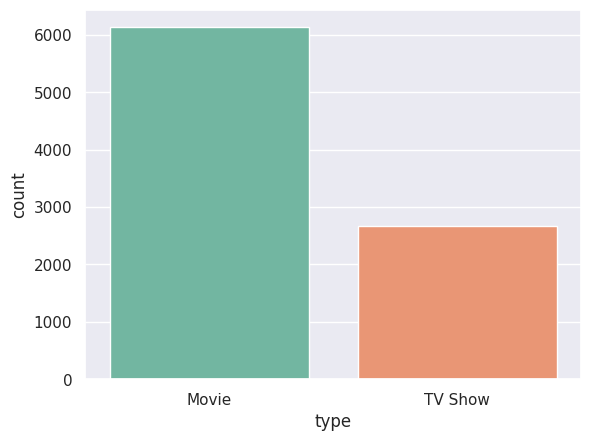

In [17]:
##################################
# 시각화의 스타일을 darkgrid로 설정
# type 컬럼의 값을 범주화시켜 바차트 그리기
##################################
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")
#######################
# x축은 type, y축은 count
# TV Show보다 Movie를 시청하는 고객이 2배 많다.
# type이란 컬럼 안에는 TV Show, Movie라는 범주만 가지고 있다.
#######################

# If a producer wants to release some content, which month must he do so?
### ( Month when least amount of content is added)

In [26]:
print(f"date_added의 null 값 : {netflix_shows[['date_added']].isnull().sum()}")
netflix_shows[['date_added']].head()

date_added의 null 값 : date_added    10
dtype: int64


,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [6]:
####################################################
# dropna로 date_added 컬럼에서 10개의 null 값 제거
# split로 값을 쪼개서 year & month 컬럼 만들기
####################################################
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [30]:
##########
# 데이터 확인
##########
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [7]:
########################################################
# 각 월을 리스트로 작성하여 거꾸로 배치한 값을 month_order 변수 넣기
# groupby로 year, month 컬럼을 묶어서 value_counts 후 unstack 코드로 pivot을 한다.
# null값에 0을 채우고 month_order로 컬럼 위치 설정 후 transpose 한다.
########################################################
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

In [32]:
netflix_date.groupby('year')['month'].value_counts()

year  month    
2008  February      1
2013  October       2
      August        1
      March         1
      September     1
                   ..
2021  April        53
      February     44
      May          38
      March        37
      January      36
Name: month, Length: 88, dtype: int64

In [35]:
netflix_date.groupby('year')['month'].value_counts().unstack()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0
2014,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2015,4.0,NaN,7.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0,4.0,1.0
2016,8.0,11.0,44.0,6.0,28.0,9.0,7.0,3.0,4.0,18.0,19.0,19.0
2017,27.0,38.0,38.0,17.0,14.0,34.0,29.0,38.0,23.0,30.0,29.0,32.0
2018,28.0,34.0,61.0,24.0,24.0,27.0,28.0,35.0,27.0,36.0,45.0,43.0
2019,43.0,44.0,47.0,45.0,37.0,59.0,46.0,53.0,48.0,68.0,65.0,37.0
2020,50.0,47.0,68.0,42.0,53.0,43.0,41.0,44.0,52.0,51.0,51.0,53.0


In [39]:
#########
# 결과 확인
#########
netflix_df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


In [24]:
np.arange(0.5, 12, 1), netflix_df.columns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 Index(['2008', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021'],
       dtype='object', name='year'))

In [23]:
sns.color_palette("afmhot_r")

[(1.0, 1.0, 0.7176470588235295),
 (1.0, 0.9274509803921569, 0.4274509803921569),
 (1.0, 0.6450980392156862, 0.1450980392156862),
 (0.8549019607843138, 0.3549019607843138, 0.0),
 (0.5725490196078431, 0.0725490196078431, 0.0),
 (0.2823529411764707, 0.0, 0.0)]

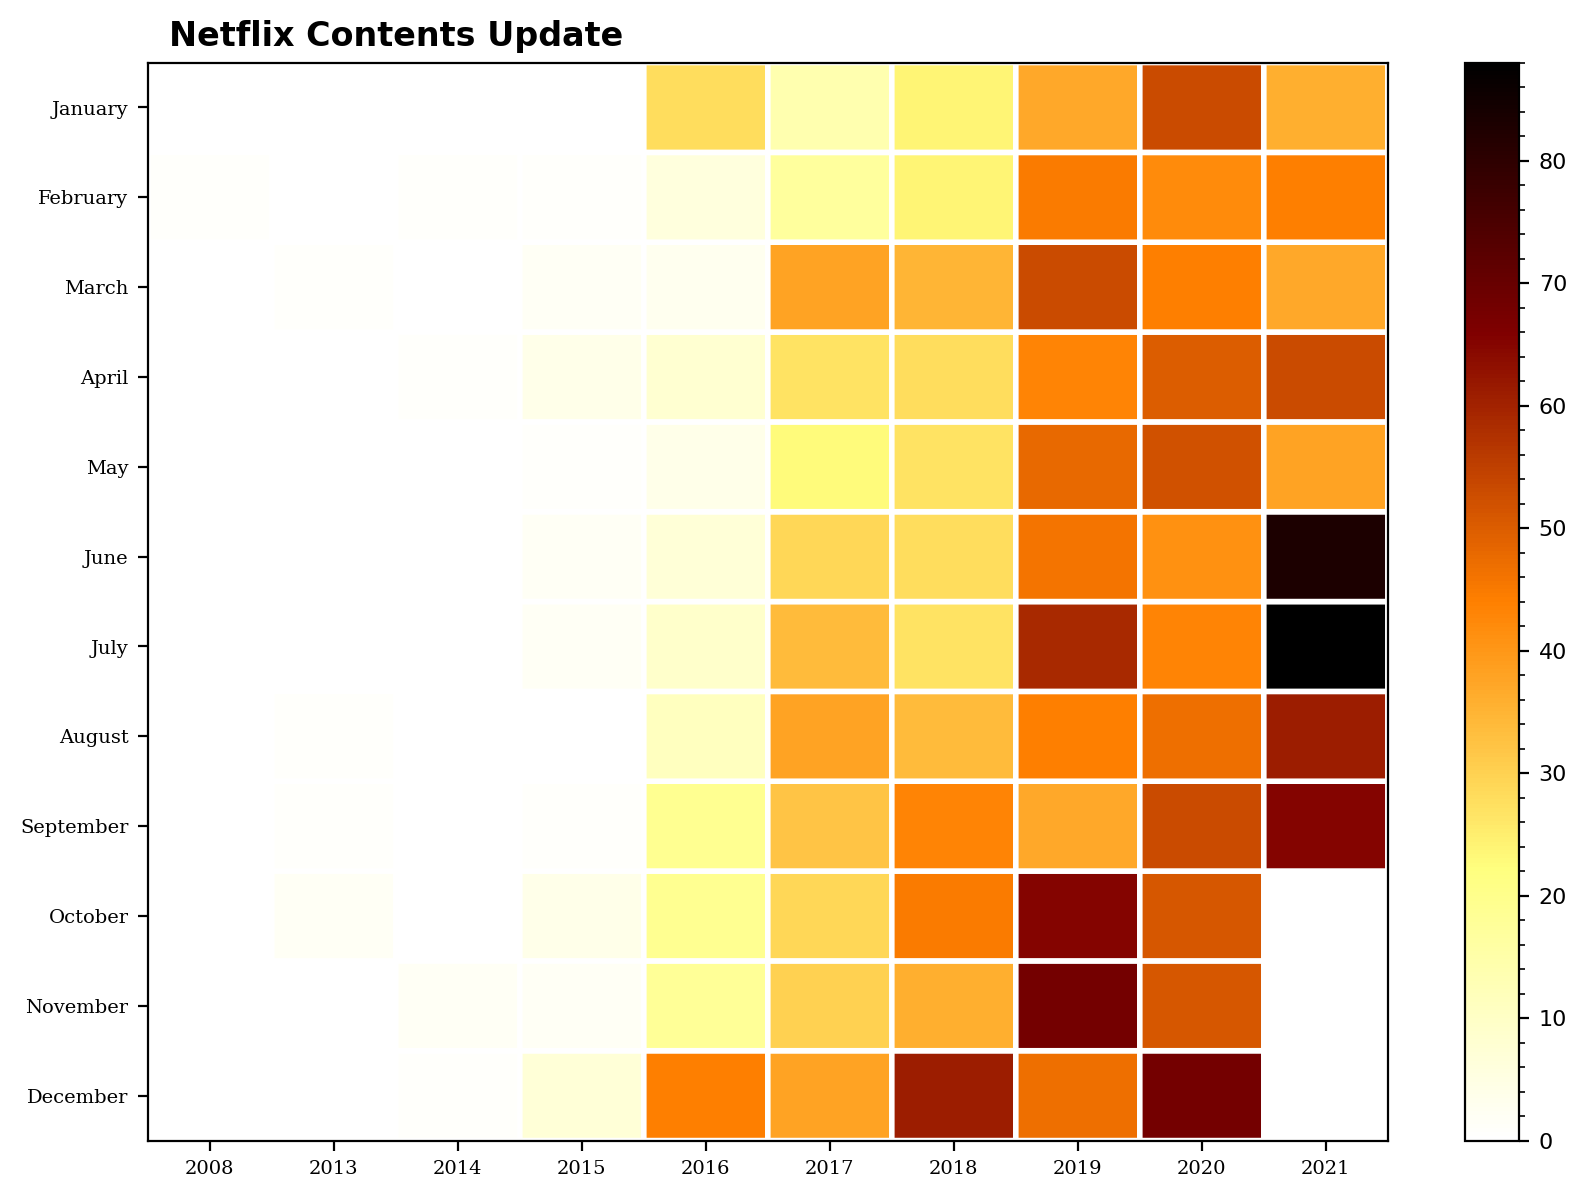

In [11]:
# 시각화 도화지 크기 설정 및 해상도 설정
# Dots per inch = DPI
plt.figure(figsize=(10, 7), dpi=200)
# pseudocolor 시각화
plt.pcolor(netflix_df,
           cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
# x, y축의 내용 삽입.
plt.xticks(np.arange(0.5, len(netflix_df.columns), 1),
           netflix_df.columns,
           fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix_df.index), 1),
           netflix_df.index,
           fontsize=7, fontfamily='serif')
# 시각화 제목 삽입.
plt.title('Netflix Contents Update',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
# 컬러바 생성 및 글꼴 크기 그리고 눈금 표시
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

netflix_df를 heatmap 으로 시각화 했다.  
컬러바의 색이 어두워질수록 컨텐츠 업데이트 수가 많다.  
21년의 6월, 7월이 컨텐츠 업데이트 수가 제일 많다.  

# Movie ratings analysis

In [28]:
netflix_movies['rating'].value_counts().index[0:15]

Index(['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'PG', 'TV-Y7', 'TV-Y', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min'],
      dtype='object')

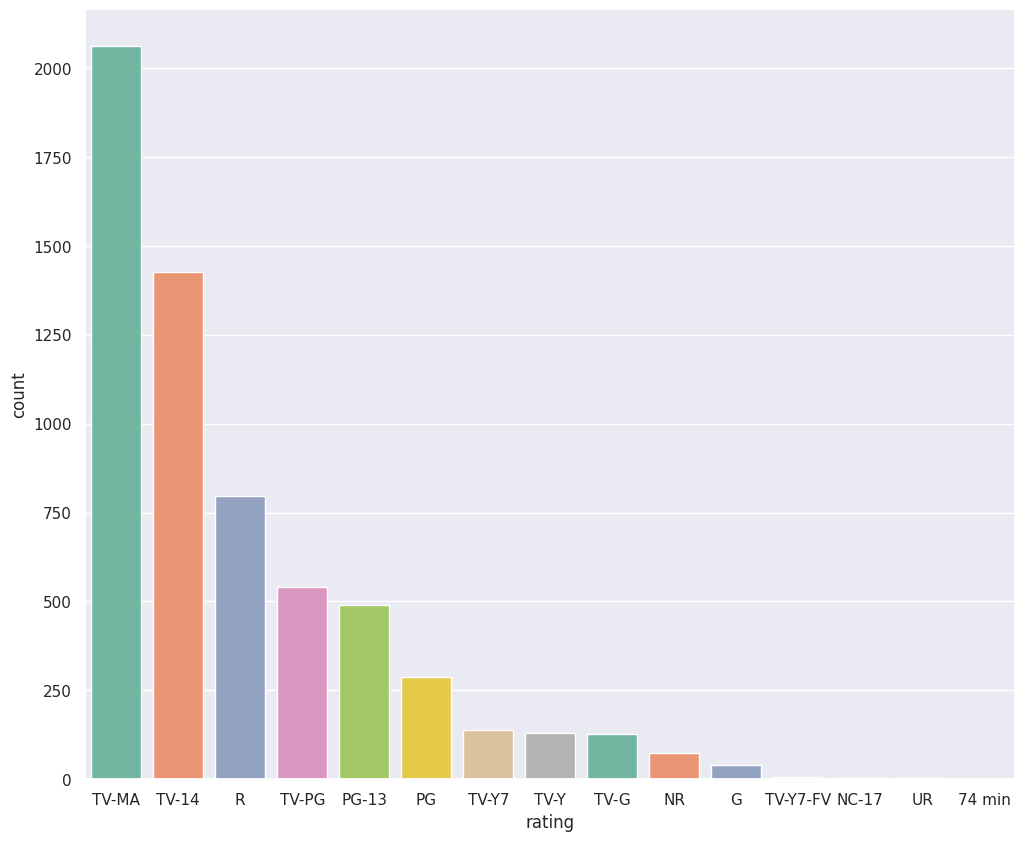

In [27]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies,
                   palette="Set2",
                   # rating의 값 17개 중 15개만 선택.
                   order=netflix_movies['rating'].value_counts().index[0:15])

### 넷플릭스 영화 시청 등급 Top 3(약 70%)
1. TV-MA (약 33%)  
> Mature Audience Only(17세 이상)

2. TV-14 (약 23%)
> 14세 미만에겐 부적절한 콘텐츠.

3. R (Restricted) (약 13%)
> 17세 미만은 보호자 동반 시청 가능.


In [45]:
############################################
# 넷플릭스의 영화 시청 등급 Top 3가 약 70%를 차지한다.
############################################
print(f"TV-MA 등급 : {round(netflix_movies['rating'].value_counts()[0] / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")
print(f"TV-14 등급 : {round(netflix_movies['rating'].value_counts()[1] / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")
print(f"R 등급 : {round(netflix_movies['rating'].value_counts()[2] / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")
print('------------------')
print(f"Top 3 등급 : {round(sum(netflix_movies['rating'].value_counts()[:3]) / sum(netflix_movies['rating'].value_counts()), 2) * 100}%")

TV-MA 등급 : 34.0%
TV-14 등급 : 23.0%
R 등급 : 13.0%
------------------
Top 3 등급 : 70.0%


# Analysing IMDB ratings to get top rated movies on Netflix